# Importing and cleaning data

Data source: https://www.kaggle.com/competitions/cafa-5-protein-function-prediction/data 

First, run the following code in the conda environment to prevent exceeding the IOPub data rate for loading fasta files and then reopen the kernel:

jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e8

And make sure all packages are installed:
- pip install biopython
- pip install pandas
- pip install obonet


In [1]:
#pip install biopython

In [2]:
#pip install obonet

In [3]:
# load packages
from Bio import SeqIO
import pandas as pd
import obonet as obo
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
set_style('whitegrid')

In [4]:
# import go-basic.obo
graph = obo.read_obo('cafa-5-protein-function-prediction/Train/go-basic.obo')

# Convert the graph to a DataFrame and reset the index
go = pd.DataFrame.from_dict(graph.nodes, orient='index').reset_index()
go1 = go.rename(columns={go.columns[0]: 'go_term'})

# Keep only important columns
go = go1[['go_term', 'name', 'namespace']]
go.head()


,go_term,name,namespace
0,GO:0000001,mitochondrion inheritance,biological_process
1,GO:0000002,mitochondrial genome maintenance,biological_process
2,GO:0000003,reproduction,biological_process
3,GO:0000006,high-affinity zinc transmembrane transporter a...,molecular_function
4,GO:0000007,low-affinity zinc ion transmembrane transporte...,molecular_function


In [5]:
go1.head()

,go_term,name,namespace,def,synonym,is_a,alt_id,subset,xref,relationship,comment
0,GO:0000001,mitochondrion inheritance,biological_process,"""The distribution of mitochondria, including t...","[""mitochondrial inheritance"" EXACT []]","[GO:0048308, GO:0048311]",NaN,NaN,NaN,NaN,NaN
1,GO:0000002,mitochondrial genome maintenance,biological_process,"""The maintenance of the structure and integrit...",NaN,[GO:0007005],NaN,NaN,NaN,NaN,NaN
2,GO:0000003,reproduction,biological_process,"""The production of new individuals that contai...","[""reproductive physiological process"" EXACT []]",[GO:0008150],"[GO:0019952, GO:0050876]","[goslim_agr, goslim_chembl, goslim_flybase_rib...",[Wikipedia:Reproduction],NaN,NaN
3,GO:0000006,high-affinity zinc transmembrane transporter a...,molecular_function,"""Enables the transfer of zinc ions (Zn2+) from...","[""high affinity zinc uptake transmembrane tran...",[GO:0005385],NaN,NaN,NaN,NaN,NaN
4,GO:0000007,low-affinity zinc ion transmembrane transporte...,molecular_function,"""Enables the transfer of a solute or solutes f...",NaN,[GO:0005385],NaN,NaN,NaN,NaN,NaN


In [6]:
# import train_sequences.fasta

fasta_train = 'cafa-5-protein-function-prediction/Train/train_sequences.fasta'

train_sequences = []

# Open the FASTA file and iterate over each record
for record in SeqIO.parse(fasta_train, "fasta"):
    # Retrieve the sequence ID and sequence
    seq_id = record.id
    sequence = str(record.seq)
    
    # Append the sequence ID and sequence as a tuple to the list
    train_sequences.append((seq_id, sequence))

# convert to dataframe
trainset = pd.DataFrame(train_sequences, columns=['seq_id', 'sequence'])
trainset.head()

,seq_id,sequence
0,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...
1,O73864,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...
2,O95231,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...
3,A0A0B4J1F4,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...
4,P54366,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...


In [7]:
# import train_taxonomy.tsv
train_taxon_ID = pd.read_csv("cafa-5-protein-function-prediction/Train/train_taxonomy.tsv", sep="\t")
train_taxon_ID.sample(5)

,EntryID,taxonomyID
138667,Q55AW9,44689
93973,Q562B7,10116
66910,D7PI15,36650
125675,B7Z0R9,7227
26087,Q59IW9,10090


In [8]:
# import train_terms.tsv
train_terms = pd.read_csv("cafa-5-protein-function-prediction/Train/train_terms.tsv", sep="\t")
train_terms.sample(5)

,EntryID,term,aspect
4288279,Q659A1,GO:0140513,CCO
665860,O22059,GO:0045595,BPO
2854368,Q96E14,GO:0009987,BPO
2775553,Q91ZJ5,GO:0044238,BPO
2424961,Q7KY08,GO:0007281,BPO


In [9]:
len(trainset['seq_id'])

142246

In [10]:
#len(train_terms[EntryID]) = len(trainset['seq_id']) = 142246
print('rows_train_terms',len(train_terms['EntryID']))
print('different_id_train_terms',len(set(train_terms['EntryID'])))

#some EntryIDs have many terms(GO:...)
train_terms['EntryID'].value_counts().sort_values(ascending=False)

rows_train_terms 5363863
different_id_train_terms 142246


Q02248    815
Q62226    736
Q01705    721
P22725    709
P01137    668
         ... 
P22179      2
C1BFM5      2
Q9NI45      2
O39491      2
F1R8A4      2
Name: EntryID, Length: 142246, dtype: int64

In [11]:
train_term = train_terms.copy()
train_term['term'] = train_term['term'].apply(lambda x: x[3:])
train_term.head()

,EntryID,term,aspect
0,A0A009IHW8,0008152,BPO
1,A0A009IHW8,0034655,BPO
2,A0A009IHW8,0072523,BPO
3,A0A009IHW8,0044270,BPO
4,A0A009IHW8,0006753,BPO


In [12]:
type(train_terms['term'][0])

str

In [13]:
train_terms['aspect'].value_counts().sort_values(ascending=False)

BPO    3497732
CCO    1196017
MFO     670114
Name: aspect, dtype: int64

In [14]:
train_terms['term'].value_counts().sort_values(ascending=False)

GO:0005575    92912
GO:0008150    92210
GO:0110165    91286
GO:0003674    78637
GO:0005622    70785
              ...  
GO:0050439        1
GO:0047470        1
GO:0033942        1
GO:0047921        1
GO:0102628        1
Name: term, Length: 31466, dtype: int64

In [15]:
set1 = set(train_terms['term'])
len(set1)

31466

In [16]:
# import IA.txt
IA = pd.read_csv("cafa-5-protein-function-prediction/IA.txt", delimiter='\t', header=None)
IA = IA.rename(columns={IA.columns[0]: 'go_term', IA.columns[1]: 'ia_score'})
IA.head()

,go_term,ia_score
0,GO:0000001,0.000000
1,GO:0000002,3.103836
2,GO:0000003,3.439404
3,GO:0000011,0.056584
4,GO:0000012,6.400377


In [17]:
set2 = set(IA['go_term'])
len(set2)

43248

In [18]:
len(set2-set1)

11782

In [19]:
43248-11782

31466

In [20]:
# import testsuperset.fasta
fasta_test = 'cafa-5-protein-function-prediction/Test (Targets)/testsuperset.fasta'

testsuperset = []

# Open the FASTA file and iterate over each record
for record in SeqIO.parse(fasta_test, "fasta"):
    # Retrieve the sequence ID and sequence
    seq_id = record.id
    sequence = str(record.seq)
    
    # Append the sequence ID and sequence as a tuple to the list
    testsuperset.append((seq_id, sequence))

# convert to dataframe
testset = pd.DataFrame(testsuperset, columns=['seq_id', 'sequence'])
testset.head()

,seq_id,sequence
0,Q9CQV8,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...
1,P62259,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...
2,P68510,MGDREQLLQRARLAEQAERYDDMASAMKAVTELNEPLSNEDRNLLS...
3,P61982,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...
4,O70456,MERASLIQKAKLAEQAERYEDMAAFMKSAVEKGEELSCEERNLLSV...


In [21]:
# import testsuperset-taxon-list.tsv
test_taxon = pd.read_csv("cafa-5-protein-function-prediction/Test (Targets)/testsuperset-taxon-list.tsv", sep="\t", encoding="latin-1")
test_taxon.sample(5)

,ID,Species
8,7955,Danio rerio[All Names]
65,196418,Hoplocephalus stephensii (snakes)
67,271848,Burkholderia thailandensis E264
22,237561,Candida albicans SC5314
52,8364,Xenopus tropicalis (tropical clawed frog)


In [22]:
# after merging trainset and train_terms, and transforming GO:... term into digits, we get the following dataframe. 
merge = pd.merge(trainset, train_term, left_on = 'seq_id', right_on = 'EntryID', how = 'inner')
merge.drop('EntryID', axis = 1, inplace = True)

merge.head()

,seq_id,sequence,term,aspect
0,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...,0008152,BPO
1,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...,0071897,BPO
2,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...,0044249,BPO
3,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...,0006259,BPO
4,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...,0009059,BPO


In [91]:
merge['len'] = merge['sequence'].apply(lambda x: len(x))

In [97]:
merge['len'].value_counts().keys()

Int64Index([ 354,  359,  317,  352,  390,  261,  351,  377,  393,  314,
            ...
            2949, 6729, 6684, 5180, 3789, 3840, 6236, 6131, 3772, 6177],
           dtype='int64', length=3716)

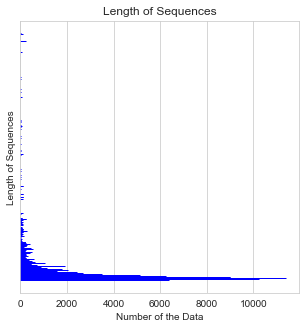

In [99]:
## Making a Figure
plt.figure(figsize=(5,5))


## calling plt.pie
## Then inputting the group sizes
plt.barh(merge['len'].value_counts().keys(), merge['len'].value_counts(),
          edgecolor = 'blue'
      )
plt.yticks([])
plt.title('Length of Sequences')
plt.xlabel('Number of the Data')
plt.ylabel('Length of Sequences')


## Displaying the Figure
plt.show()

In [23]:
len(merge)

5363863

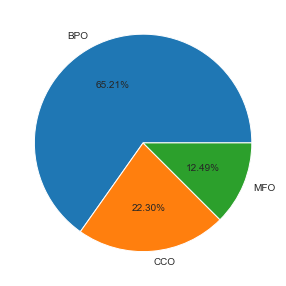

In [49]:
## Making a Figure
plt.figure(figsize=(5,5))


## calling plt.pie
## Then inputting the group sizes
plt.pie(merge['aspect'].value_counts(),
       labels= merge['aspect'].value_counts().keys(),
      autopct="%1.2f%%" )

## Displaying the Figure
plt.show()

In [24]:
L = {'A':1, 'B':2, 'C':3, 'D':4,'E':5,
     'F':6,'G':7,'H':8,'I':9,'J':10,
     'K':11,'L':12,'M':13,'N':14,'O':15,
     'P':16,'Q':17,'R':18, 'S':19, 'T':20,
     'U':21, 'V':22, 'W':23,'X':24,'Y':25,'Z':26}

In [69]:
#we can try bigger later
tt = merge['term'].value_counts().sort_values(ascending=False)[:10]
print('number of different terms',len(tt.values))
#tt = set(tt)
type(tt)
print(tt)

number of different terms 10
0005575    92912
0008150    92210
0110165    91286
0003674    78637
0005622    70785
0009987    61293
0043226    60883
0043229    58315
0005488    57380
0043227    55452
Name: term, dtype: int64


In [73]:
t = merge['term'].value_counts().sort_values(ascending=False)[:500]


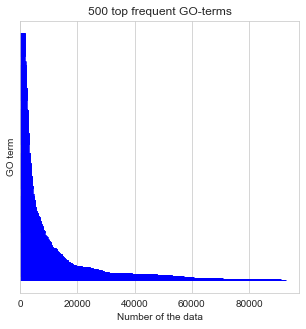

In [90]:
## Making a Figure
plt.figure(figsize=(5,5))


## calling plt.pie
## Then inputting the group sizes
plt.barh(t[::-1].keys(), t.values,
          edgecolor = 'blue'
      )
plt.yticks([])
plt.title('500 top frequent GO-terms')
plt.xlabel('Number of the data')
plt.ylabel('GO term')


## Displaying the Figure
plt.show()

In [26]:
dt = pd.DataFrame()
for i in tt.index:
    dtt = merge[merge['term']==i]
    print(len(dtt))
    dt = dt.append(dtt, ignore_index=True)

print('number of rows in dt with high frequency terms',len(dt))


92912
92210
91286
78637
70785
61293
60883
58315
57380
55452
number of rows in dt with high frequency terms 719153


In [79]:
dt['len'] = dt['sequence'].apply(lambda x: len(x))

In [83]:
dt = dt[dt['len']>1000]

In [84]:
len(dt)

85517

In [27]:
# make every sequence of length 100
dt['X'] = dt['sequence'].apply(lambda x: x[:100])
dt['X'] = dt['X'].apply(lambda x: [L[y] for y in x])
#dt['X'] = dt['X'].apply(lambda x: x+[0]*(100-len(x)) if len(x)<100 else x)


In [28]:
dt.head()

,seq_id,sequence,term,aspect,X
0,O73864,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...,0005575,CCO,"[13, 20, 5, 25, 18, 14, 6, 12, 12, 12, 6, 9, 2..."
1,O95231,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...,0005575,CCO,"[13, 18, 12, 19, 19, 19, 16, 16, 18, 7, 16, 17..."
2,A0A0B4J1F4,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...,0005575,CCO,"[13, 7, 7, 5, 1, 7, 1, 4, 7, 16, 18, 7, 18, 22..."
3,P54366,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...,0005575,CCO,"[13, 22, 5, 20, 14, 19, 16, 16, 1, 7, 25, 20, ..."
4,P33681,MGHTRRQGTSPSKCPYLNFFQLLVLAGLSHFCSGVIHVTKEVKEVA...,0005575,CCO,"[13, 7, 8, 20, 18, 18, 17, 7, 20, 19, 16, 19, ..."


In [29]:
#This add a column seq_list, transforming list of letters of 'sequence' column into a list of numbers. 
#So that we can feed the data to neural network
#merge['seq_list'] = merge['sequence'].apply(lambda x: [L[y] for y in x])

In [30]:
#This is am example of doing it for the first 10 rows.
#merge['seq_list'] = merge['sequence'].iloc[:10].apply(lambda x: [L[y] for y in x])
#merge.iloc[:10]

In [31]:
# transferring to list of numbers is very time consuming, and the data file is super large.
# As a compensate, we can sum the numbers corresponding to letters in sequence.
#this will make the model very inaccurate. but I think it is doable at least.
#If the previous chunk of code can be run on your laptop, it would be great, and then we can omit this one.
#def help(s):
#    ans = 0
#    for i in s:
#        ans += L[i]
#    return ans/len(s)
##sum the numbers corresponding to letters in sequence, and add a column called seq_sum.
#merge['seq_sum'] = merge['sequence'].apply(help)

In [32]:
# check for missing data
#print('go: \n', go.isna().sum(), '\n')
#print('trainset: \n', trainset.isna().sum(), '\n')
#print('train_taxon_ID: \n', train_taxon_ID.isna().sum(), '\n')
#print('train_terms: \n', train_terms.isna().sum(), '\n')
#print('IA: \n', IA.isna().sum(), '\n')
#print('testset: \n', testset.isna().sum(), '\n')
#print('test_taxon: \n', test_taxon.isna().sum(), '\n')


In [33]:
#data = pd.read_csv('data_total.csv')

Train test split:

In [34]:
X = dt['X']
y = dt['term']

In [89]:
type(X)

pandas.core.series.Series

In [36]:
y.values

array(['0005575', '0005575', '0005575', ..., '0043227', '0043227',
       '0043227'], dtype=object)

In [37]:
# Transform the labels into numerical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y.values.astype(str))
y['code'] = label_encoder.transform(y.values.astype(str)).astype(int)


In [38]:
z =pd.DataFrame()
z = y['code']
z = z.transpose()
z.shape

(719153,)

In [39]:
#train test split
from sklearn.model_selection import train_test_split
X_t, X_v, y_t, y_v = train_test_split(X,z, test_size = 0.2, random_state = 420, stratify =z)

In [87]:
array = pd.DataFrame(X_t.to_list())

KeyboardInterrupt: 

In [45]:
X_val = pd.DataFrame(X_v.to_list())

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
# extract features by convert sequences to k-mer features
k = 3
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(k, k))
X_train_vectors = vectorizer.fit_transform(X_t)
X_test_vectors = vectorizer.transform(X_v)

AttributeError: 'list' object has no attribute 'lower'

In [41]:
array.shape

(575322, 100)

In [42]:
#data[data['term'].map(data['term'].value_counts()) > 15000]
#df = data[data['term'].value_counts()>5000]

In [43]:
## Making a Figure
#plt.figure(figsize=(5,5))

#plt.hist(data['term'], bins = 10)

## Displaying the Figure
#plt.show()

In [44]:
## make a model
## Set kernel = 'poly', degree = 2, C = 1000
#svc = SVC(kernel='poly', degree=2, C=1000)

## fit a model
#svc.fit(array, y_t)

In [47]:
# random forest classifier with default parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

rf.fit(array, y_t)
rf_y_val_pred = rf.predict(X_val)
accuracy_score(y_v, rf_y_val_pred)

0.02140706801732589

In [ ]:
#applying SVM
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score
# svc with rbf kernel
#svc = SVC(C=4, kernel = 'rbf')
#svc.fit(array, y_t)
#svc_y_v_pred = svc.predict(X_val)
#accuracy_score(y_v, svc_y_v_pred)